In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import os
workdir_path = '/content/drive/My Drive/' + '00 PUC BI MASTER/00 - PROJ (TCC)/PREDIÇÃO ATIVIDADES/event2mind'  # Inserir o local da pasta onde estão os arquivos de entrada (treino e teste)
os.chdir(workdir_path)

IMPORTS NECESSÁRIOS

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from tqdm import tqdm
from gensim.models import Doc2Vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
import nltk.data
nltk.download('punkt')

import matplotlib.pyplot as plt
%matplotlib inline

import warnings;
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


JUNTAR TODAS AS INTENÇOES NUMA ÚNICA LISTA


In [4]:
dataset = pd.read_csv('event2MindClean.csv')
dataset_filter = dataset[dataset['Xintent'] != "none"]

In [5]:
def removeCaracteres(nomeColuna, dataSet):
  dataSet[nomeColuna]= dataSet[nomeColuna].astype(str)
  dataSet[nomeColuna] = dataSet[nomeColuna].str.replace("`` ve", "")
  dataSet[nomeColuna] = dataSet[nomeColuna].str.replace("`` s", "")
  dataSet[nomeColuna] = dataSet[nomeColuna].str.replace("'", "")
  dataSet[nomeColuna] = dataSet[nomeColuna].str.replace("&", " ")
  dataSet[nomeColuna] = dataSet[nomeColuna].str.replace(",", " ")
  dataSet[nomeColuna] = dataSet[nomeColuna].str.replace("  ", " ")
  
removeCaracteres('Xintent_2', dataset_filter)

In [ ]:
dataset_filter.head(5)

,Indice,Xintent,Xemotion,Event,Xsent,Osent,Event_2,Xemotion_2,Xintent_2
772,773,to have an advantage,pleased,PersonX uses PersonX's ___ to obtain,3.0,2.0,"'personx, ', ',', 'us, ', ',', 'personx, ', ',...",'pleased ',advantage
773,773,to have an advantage,smug,PersonX uses PersonX's ___ to obtain,3.0,2.0,"'personx, ', ',', 'us, ', ',', 'personx, ', ',...",'smug ',advantage
774,773,to have an advantage,excited,PersonX uses PersonX's ___ to obtain,3.0,2.0,"'personx, ', ',', 'us, ', ',', 'personx, ', ',...",'excited ',advantage
775,773,to fulfill a desire,pleased,PersonX uses PersonX's ___ to obtain,3.0,2.0,"'personx, ', ',', 'us, ', ',', 'personx, ', ',...",'pleased ',fulfill desire
776,773,to fulfill a desire,smug,PersonX uses PersonX's ___ to obtain,3.0,2.0,"'personx, ', ',', 'us, ', ',', 'personx, ', ',...",'smug ',fulfill desire


LISTA COM VALORES DISTINTOS

In [6]:
w2v_total_data = list(dataset_filter['Xintent_2'].unique())
lista_intencoes = list(dataset_filter['Xintent'].unique())
len(w2v_total_data)

25791

FUNÇÃO PARA MODELO DOC2VEC


In [ ]:
def build_model(max_epochs, vec_size, alpha, text):
    
    train_text = [TaggedDocument(words=str(s).lower().split(), tags=[i]) for i, s in enumerate(text)]

    model = Doc2Vec(vector_size = vec_size,
                 hs = 1 #hierarquical softmax
               , dm = 0
               , dm_concat = 0
               , dbow_words = 1
               , window = 10
               , alpha= alpha
               , min_alpha= 0.00025
               , min_count= 1
               )
    
    model.build_vocab(train_text)
    
    # With the model built we simply train on the data.
    
    for epoch in range(max_epochs):
        print(f"Iteration {epoch}")
        model.train(train_text,
                   total_examples=model.corpus_count,
                   epochs=model.epochs)

     # Now simply save the model to avoid training again. 
    
    model.save("Event2Mind_Intentions.model")
    print("Model Saved")
    return model


APLLICANDO O MODELO

In [ ]:
model = build_model(max_epochs=250, vec_size=400, alpha=0.03, text = w2v_total_data)

Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iteration 28
Iteration 29
Iteration 30
Iteration 31
Iteration 32
Iteration 33
Iteration 34
Iteration 35
Iteration 36
Iteration 37
Iteration 38
Iteration 39
Iteration 40
Iteration 41
Iteration 42
Iteration 43
Iteration 44
Iteration 45
Iteration 46
Iteration 47
Iteration 48
Iteration 49
Iteration 50
Iteration 51
Iteration 52
Iteration 53
Iteration 54
Iteration 55
Iteration 56
Iteration 57
Iteration 58
Iteration 59
Iteration 60
Iteration 61
Iteration 62
Iteration 63
Iteration 64
Iteration 65
Iteration 66
Iteration 67
Iteration 68
Iteration 69
Iteration 70
Iteration 71
Iteration 72
Iteration 73
Iteration 74
Iteration 75
Iteration 76
Iteration

In [ ]:
model.wv.similar_by_word("person")

[('counsel', 0.23212292790412903),
 ('persony', 0.21278466284275055),
 ('preference', 0.20058900117874146),
 ('floor', 0.19828388094902039),
 ('others', 0.19727633893489838),
 ('wash', 0.19458453357219696),
 ('dentist', 0.1891067773103714),
 ('persons', 0.18664689362049103),
 ('night/day', 0.1862172931432724),
 ('dan', 0.181436687707901)]

In [ ]:
model.wv.similar_by_word("get")

[('cheeseburger', 0.2476562112569809),
 ('trend', 0.21478822827339172),
 ('spceifies', 0.21478594839572906),
 ('forge', 0.21307995915412903),
 ('anew', 0.20961515605449677),
 ('attends', 0.2025405913591385),
 ('driven', 0.20186302065849304),
 ('articulate', 0.19950255751609802),
 ('put', 0.19905242323875427),
 ('soon', 0.19831599295139313)]

In [ ]:
model.wv.similar_by_word("make")

[('sure', 0.26325175166130066),
 ('hobo', 0.2432863861322403),
 ('arts', 0.22739343345165253),
 ('influence', 0.2161092311143875),
 ('mothers', 0.21566841006278992),
 ('hitch', 0.21527385711669922),
 ('tied', 0.2129884660243988),
 ('pipes', 0.20999212563037872),
 ('freeze', 0.20914597809314728),
 ('seriously', 0.20725616812705994)]

In [ ]:
model.wv.similar_by_word("something")


[('things', 0.2074083387851715),
 ('flowers', 0.19987908005714417),
 ('thing', 0.18794676661491394),
 ('possoession', 0.1808266043663025),
 ('turkey', 0.17840313911437988),
 ('grammys', 0.17383620142936707),
 ('thing/things', 0.17310212552547455),
 ('argument', 0.1727478802204132),
 ('slowly', 0.17251868546009064),
 ('blueberries', 0.17243234813213348)]

In [ ]:
model.wv.similar_by_word("help")

[('refrain', 0.23445948958396912),
 ('complain', 0.22230860590934753),
 ('productivity', 0.21440371870994568),
 ('brag', 0.2023806869983673),
 ('recommends', 0.1941228210926056),
 ('polls', 0.19050052762031555),
 ('chair', 0.18999215960502625),
 ('sabotage', 0.18968689441680908),
 ('nurturer', 0.18829181790351868),
 ('helped', 0.1870477944612503)]

In [ ]:
model.wv.similar_by_word("home")

[('designated', 0.28951120376586914),
 ('somewhere', 0.26887696981430054),
 ('outside', 0.2505943179130554),
 ('organizes', 0.2467246800661087),
 ('starts', 0.24387601017951965),
 ('wavering', 0.23695677518844604),
 ('dropped', 0.23385287821292877),
 ('drive', 0.23229610919952393),
 ('unwind', 0.229083850979805),
 ('hotel', 0.225023552775383)]

In [ ]:
model.wv.similar_by_word("helpful")


[('explaining', 0.272891104221344),
 ('courteous', 0.2695104479789734),
 ('connected', 0.25425273180007935),
 ('step', 0.2413545697927475),
 ('tutor', 0.23939183354377747),
 ('batting', 0.23601821064949036),
 ('hour', 0.23504433035850525),
 ('airplane', 0.2341548055410385),
 ('accommodate', 0.23394599556922913),
 ('completely', 0.23346129059791565)]

In [ ]:
model.wv.similar_by_word("fun")


[('compete', 0.2795690596103668),
 ('3', 0.2677873969078064),
 ('chill', 0.2612802982330322),
 ('themselved', 0.2532808780670166),
 ('successes', 0.2521825432777405),
 ('umpire', 0.2516044080257416),
 ('daylight', 0.2509085536003113),
 ('arranges', 0.25010794401168823),
 ('emhance', 0.24911484122276306),
 ('function', 0.24534082412719727)]

In [ ]:
model.wv.similar_by_word("nice")

[('trim', 0.2871052026748657),
 ('flowers', 0.26791661977767944),
 ('hawaii', 0.25609415769577026),
 ('fresh', 0.2359752655029297),
 ('piercing', 0.2300061583518982),
 ('spacious', 0.22947508096694946),
 ('exciting', 0.22668558359146118),
 ('presentable', 0.22484052181243896),
 ('vandalize', 0.2244071364402771),
 ('pretty', 0.22436189651489258)]

EXTRAINDO OS VETORES

In [8]:
X = model[model.wv.vocab] #matriz de palavras
Y = model.docvecs.vectors_docs #matriz de intenções

#transforma em lista
vetorDoc = []
for i in range(0, len(Y)):
    vetorDoc.append(Y[i])

len(vetorDoc)

25791

DESCOBRINDO NÚMERO IDEAL PARA ANALISE DE COMPONENTES

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95) #Explicar 95% da variância
pca.fit(vetorDoc)
vetorDoc_pca = pca.transform(vetorDoc)

componentes = vetorDoc_pca.shape[1]

In [10]:
print(componentes)

129


GERANDO CLUSTERS A PARTIR DAS DIMENSÕES

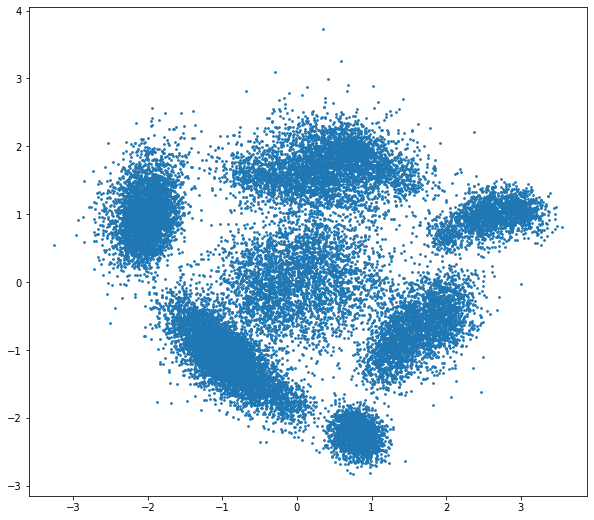

In [11]:
#import umap
#alterar o número de componentes
#cluster_embedding = umap.UMAP(n_neighbors=10, min_dist=0.0,
#                              n_components = componentes, random_state=42).fit_transform(vetorDoc) #INCLUIR A MATRIZ COM AS DIMENSÕES DO MODELO

cluster_embedding = vetorDoc_pca

plt.figure(figsize=(10,9))
plt.scatter(cluster_embedding[:, 0], cluster_embedding[:, 1], s=3, cmap='Spectral')

AVALIANDO MELHOR NUMERO DE CLUSTERS

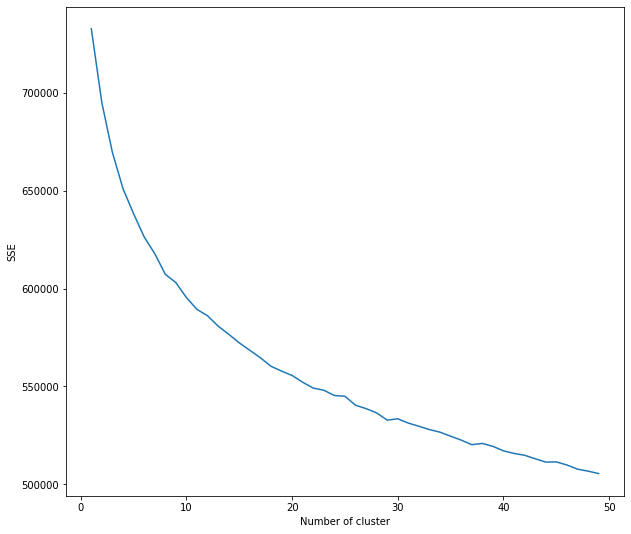

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = {}
for k in range(1, 50):
    kmeans = KMeans(n_clusters=k, max_iter=500).fit(cluster_embedding)
    #cluster_embedding["clusters"] = kmeans.labels_
    #print(cluster_embedding["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

plt.figure(figsize=(10,9))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

APLICANDO O K-MEANS

In [47]:
from sklearn.cluster import KMeans
#from sklearn.neighbors import NearestNeighbors

kmeans = KMeans(n_clusters=7).fit(cluster_embedding)

#knn_aux = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(cluster_embedding)
#distances, indices = knn_aux.kneighbors(cluster_embedding)

cluster = kmeans.predict(cluster_embedding)

In [33]:
#cluster = indices[:, 1]

In [59]:
import plotly.express as px
df_fig = pd.DataFrame(list(zip(cluster_embedding[:, 0], cluster_embedding[:, 1], cluster_embedding[:, 2], cluster)), 
               columns =['dim1', 'dim2','dim3' , 'cluster']) 

fig = px.scatter_3d(df_fig, x = 'dim1', y = 'dim2' , z = 'dim3', color = 'cluster' )
fig.show()

No handles with labels found to put in legend.


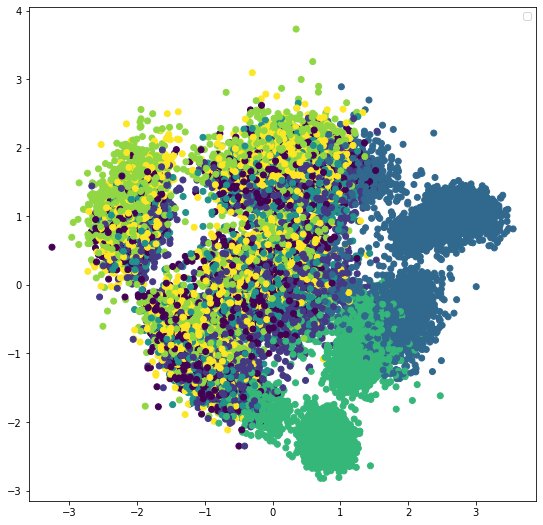

In [60]:
plt.figure(figsize=(20,20))
plt.subplot(223)
plt.scatter(cluster_embedding[:, 0], cluster_embedding[:, 1], c=cluster)
plt.legend()

In [ ]:
# Calling DataFrame constructor after zipping 
# both lists, with columns specified 
df = pd.DataFrame(list(zip(vetorDoc, cluster, w2v_total_data)), 
               columns =['vetor_doc_str', 'cluster_intents', 'Xintent']) 

df2 = pd.DataFrame(list(zip(cluster, w2v_total_data)), 
               columns =['cluster_intents', 'Xintent']) 

In [ ]:
df['cluster_intents'].value_counts()

4    4421
2    4273
0    3932
6    3426
3    3416
1    3303
5    3020
Name: cluster_intents, dtype: int64

In [ ]:
export_path = workdir_path + '/embeddingsIntencoes.csv'
export_path2 = workdir_path + '/clusterIntencoes.csv'

df.to_csv (export_path, index = False, header=True)
df2.to_csv (export_path2, index = False, header=True)

In [7]:
#alterar nome do modelo
from gensim.models import Doc2Vec
model = Doc2Vec.load("Event2Mind_Intentions.model")